In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 37.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#!unzip "/content/drive/MyDrive/untitled folder 3.zip"

In [ ]:
#!pip install split-folders

In [ ]:
#import splitfolders
#splitfolders.ratio('/content/untitled folder', output="/content/drive/MyDrive/output", seed=1337, ratio=(.8, 0.1,0.1))


In [ ]:
import tensorflow as tf		# TensorFlow object reference
from tensorflow import keras	# Keras is a high level API used in TensorFlow that allows us to more easily create neural networks by writing "less code". Keras does most of the heavy lifting for us when creating models. Since we won't be defining our own Tensors and diving deep into the neural network code, Keras allows us to create a simple network quickly.
import numpy as np		# A numerical function library for Python
import matplotlib.pyplot as plt		# matplotlib will allow us to graph data we're using
import time
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [ ]:
class_names = ['Normal','Left', 'Right','Atrial','Ventricular',
               'Supra Ventricular','Paced Beat','FUPBN','FUVN','IQRS','Vfl','Nodal']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [ ]:
train_dir = "/content/drive/MyDrive/output/train"
test_dir = "/content/drive/MyDrive/output/test"
val_dir = "/content/drive/MyDrive/output/val"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [ ]:
keras.backend.clear_session()

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,batch_size=32,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
# Note: the test data is the same as the previous experiment, we could
# skip creating this, but we'll leave this here to practice.
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE
                                                                )


Found 15372 files belonging to 12 classes.
Found 1927 files belonging to 12 classes.
Found 1919 files belonging to 12 classes.


In [ ]:
# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False


In [ ]:
# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
#x = data_augmentation(inputs) # augment our training images
x = base_model(inputs, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(12, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)


In [ ]:
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
!pip install model_profiler
from model_profiler import model_profiler

Batch_size = 32
profile = model_profiler(base_model, Batch_size)

print(profile)


| Model Profile                    | Value         | Unit    |
|----------------------------------|---------------|---------|
| Selected GPUs                    | None Detected | GPU IDs |
| No. of FLOPs                     | 3.1715        | BFLOPs  |
| GPU Memory Requirement           | 0.0158        | GB      |
| Model Parameters                 | 4.0496        | Million |
| Memory Required by Model Weights | 15.4479       | MB      |


In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 30
Fine_tuning_entire_dataset = model_2.fit(train_data,
                                          epochs=initial_epochs,
                                          validation_data=val_data,
                                          validation_steps=int(0.25 * len(val_data)), # do less steps per validation (quicker)
                                          )


Epoch 1/30
481/481 [==============================] - 151s 301ms/step - loss: 1.2513 - accuracy: 0.6745 - val_loss: 0.8434 - val_accuracy: 0.7667
Epoch 2/30
481/481 [==============================] - 139s 289ms/step - loss: 0.7075 - accuracy: 0.8055 - val_loss: 0.6550 - val_accuracy: 0.7833
Epoch 3/30
481/481 [==============================] - 141s 292ms/step - loss: 0.5680 - accuracy: 0.8336 - val_loss: 0.5568 - val_accuracy: 0.8375
Epoch 4/30
481/481 [==============================] - 147s 306ms/step - loss: 0.4919 - accuracy: 0.8549 - val_loss: 0.4760 - val_accuracy: 0.8583
Epoch 5/30
481/481 [==============================] - 142s 294ms/step - loss: 0.4393 - accuracy: 0.8707 - val_loss: 0.4520 - val_accuracy: 0.8562
Epoch 6/30
481/481 [==============================] - 141s 292ms/step - loss: 0.4017 - accuracy: 0.8808 - val_loss: 0.4826 - val_accuracy: 0.8375
Epoch 7/30
481/481 [==============================] - 137s 285ms/step - loss: 0.3707 - accuracy: 0.8918 - val_loss: 0.4242 -

In [ ]:
test_results = model_2.evaluate(test_data)
test_results

61/61 [==============================] - 16s 261ms/step - loss: 0.1879 - accuracy: 0.9382


[0.18793019652366638, 0.938245952129364]

In [ ]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

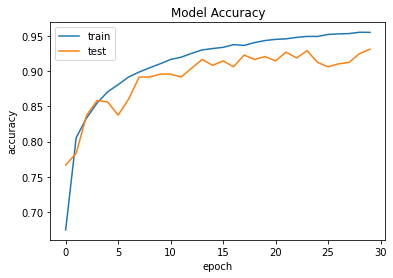

In [ ]:
import matplotlib.pyplot as plt
#plotting the Accuracy of test and training sets
plt.plot(Fine_tuning_entire_dataset.history['accuracy'])
plt.plot(Fine_tuning_entire_dataset.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

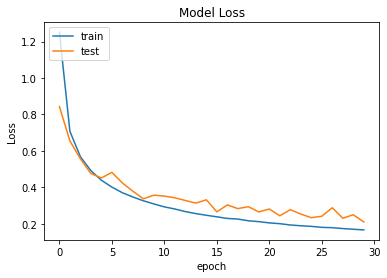

In [ ]:
import matplotlib.pyplot as plt
#plotting the Accuracy of test and training sets
plt.plot(Fine_tuning_entire_dataset.history['loss'])
plt.plot(Fine_tuning_entire_dataset.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#@title Default title text
y_pred = model_2.predict(test_data)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_labels,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       200
           1       0.96      0.96      0.96       130
           2       0.97      0.84      0.90       131
           3       0.92      0.99      0.95       209
           4       0.99      0.98      0.99       200
           5       0.82      0.96      0.88        24
           6       0.98      1.00      0.99       200
           7       0.96      0.97      0.96       185
           8       0.92      0.97      0.95       200
           9       0.91      0.89      0.90       200
          10       1.00      0.83      0.91        48
          11       0.88      0.91      0.89       200

    accuracy                           0.94      1927
   macro avg       0.94      0.93      0.93      1927
weighted avg       0.94      0.94      0.94      1927



In [ ]:
classes=[i for i in range(12)]
con_mat_df = pd.DataFrame(confusion_matrix(y_labels,y_pred),
                     index = classes,
                     columns = classes)

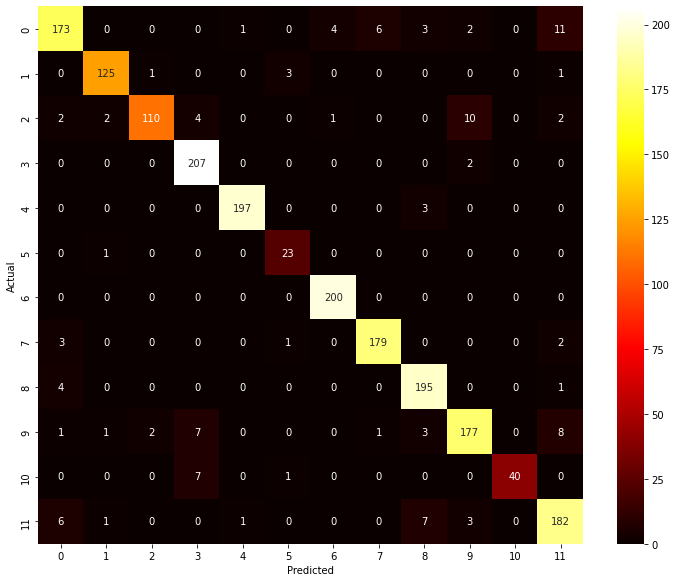

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(10, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.hot,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Layers in loaded model
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer.trainable)


True
False
True
True


In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 12)                15372     
                                                                 
Total params: 4,064,943
Trainable params: 15,372
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# How many layers are trainable in our base model?
print(len(model_2.layers[1].trainable_variables)) # layer at index 2 is the EfficientNetB0 layer (the base model)

0


In [ ]:
print(len(base_model.trainable_variables))

0


In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-177]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
print(len(model_2.trainable_variables))

161


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 10

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tuning = model_2.fit(train_data,
                                               epochs=fine_tune_epochs,
                                               validation_data=val_data,
                                               initial_epoch=Fine_tuning_entire_dataset.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(val_data))
                                               ) #

Epoch 30/40
481/481 [==============================] - 327s 665ms/step - loss: 0.2177 - accuracy: 0.9350 - val_loss: 0.1567 - val_accuracy: 0.9667
Epoch 31/40
481/481 [==============================] - 304s 633ms/step - loss: 0.0901 - accuracy: 0.9698 - val_loss: 0.1452 - val_accuracy: 0.9729
Epoch 32/40
481/481 [==============================] - 308s 639ms/step - loss: 0.0596 - accuracy: 0.9789 - val_loss: 0.1916 - val_accuracy: 0.9521
Epoch 33/40
481/481 [==============================] - 303s 629ms/step - loss: 0.0382 - accuracy: 0.9872 - val_loss: 0.1483 - val_accuracy: 0.9667
Epoch 34/40
481/481 [==============================] - 302s 628ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.1095 - val_accuracy: 0.9625
Epoch 35/40
481/481 [==============================] - 287s 597ms/step - loss: 0.0227 - accuracy: 0.9920 - val_loss: 0.2202 - val_accuracy: 0.9500
Epoch 36/40
481/481 [==============================] - 297s 618ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0

In [ ]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

61/61 [==============================] - 13s 219ms/step - loss: 0.0564 - accuracy: 0.9850


[0.05641857534646988, 0.9849507212638855]

In [ ]:
y_pred_2 = model_2.predict(test_data)
y_pred_2 = np.argmax(y_pred_2,axis=1)

In [ ]:
y_pred_2

array([11,  0,  0, ..., 11, 11, 11])

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=20):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

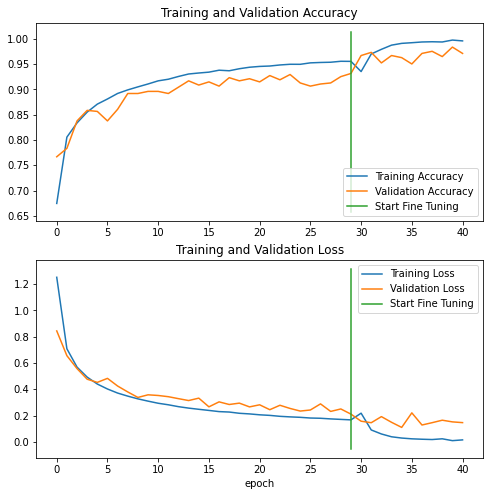

In [ ]:
compare_historys(original_history=Fine_tuning_entire_dataset,
                 new_history=history_fine_tuning,
                 initial_epochs=30)

In [ ]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, y_pred_2)
sklearn_accuracy


0.9849507005708354

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_labels,y_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       200
           1       0.99      1.00      1.00       130
           2       1.00      1.00      1.00       131
           3       0.99      1.00      0.99       209
           4       1.00      1.00      1.00       200
           5       0.92      0.96      0.94        24
           6       1.00      1.00      1.00       200
           7       1.00      0.98      0.99       185
           8       0.99      0.99      0.99       200
           9       0.97      0.97      0.97       200
          10       1.00      0.96      0.98        48
          11       0.96      0.96      0.96       200

    accuracy                           0.98      1927
   macro avg       0.98      0.98      0.98      1927
weighted avg       0.98      0.98      0.98      1927



In [ ]:
classes=[i for i in range(12)]
con_mat_df = pd.DataFrame(confusion_matrix(y_labels,y_pred_2),
                     index = classes,
                     columns = classes)

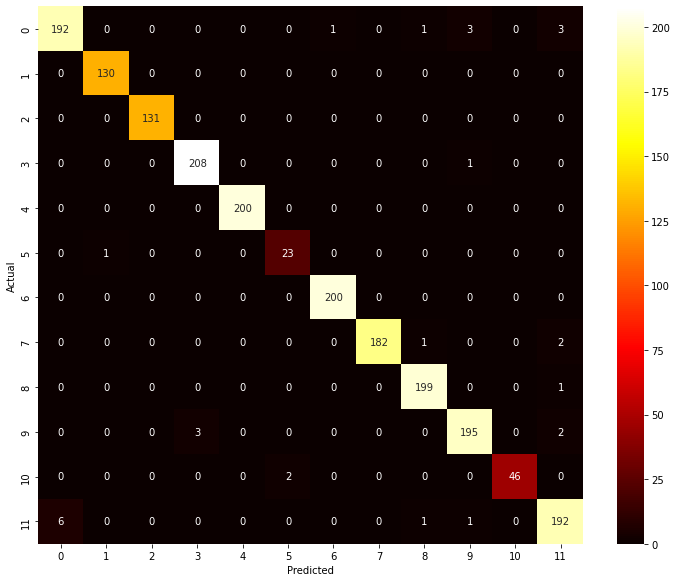

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(10, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.hot,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()